## SIMPLE LINEAR REGRESSION
In simple linear regression, we predict the output/dependent variable based on only one input feature.

The simple linear regression is given by $Y = mX + b$

Where,

$Y$ = output

$X$ = input feature on which output is based

$m$ = coefficient of input features

$b$ = constant or y - intercept of line

### Import the python libraries we are going to use

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import r2_score

### Read the dataset.
In this project we are going to use vehicle model data set which contains data about various car models and their carbon emmisions.

In [2]:
data = pd.read_csv("Datasets/FuelConsumptionCo2.csv")
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Select the features we are going to use
The goal of this project will be to predict the value of `co2 emmissions` from the value of `engine size` in our dataset.

In [3]:
features = data[["ENGINESIZE", "CO2EMISSIONS"]]

### Visualizing our features
We will create a scatter plot to visualize the data points in our features.
The plot will be on `ENGINESIZE` X, against `CO2EMISSIONS` Y

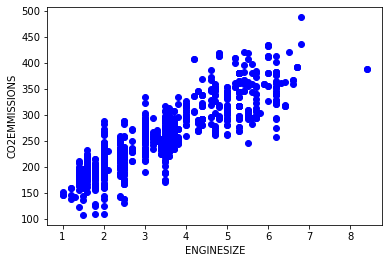

In [4]:
plt.scatter(features["ENGINESIZE"], features["CO2EMISSIONS"], color="blue")
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMMISSIONS")
plt.show()

### Split our data
We are going to split our dataset and use 80% to train our model and the remaining 20% to test it

In [5]:
# We are using 80% data for training.
train = data[:(int((len(data)*0.8)))]
test = data[(int((len(data)*0.8))):]# Modeling:
# Using sklearn package to model data :
regr = linear_model.LinearRegression()
train_x = np.array(train[["ENGINESIZE"]])
train_y = np.array(train[["CO2EMISSIONS"]])

### Training our model
We are going to train our model and find coefficients for our best-fit regression line.

In [6]:
regr = linear_model.LinearRegression()
regr.fit(np.array(train_x), np.array(train_y))

# print the coefficients
print("coefficients: ", regr.coef_) # the slope
print("Intercept: ", regr.intercept_) # Intercept

coefficients:  [[38.79512384]]
Intercept:  [127.16989951]


### Plotting the best fit line
Based on the coefficients, we can plot the best fit line for our dataset.

Text(0, 0.5, 'Emission')

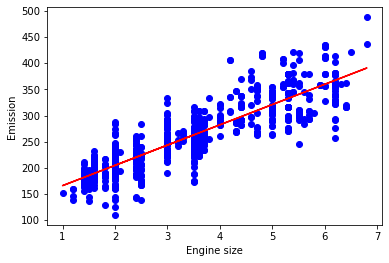

In [7]:
plt.scatter(train["ENGINESIZE"], train["CO2EMISSIONS"], color='blue')
plt.plot(train_x, regr.coef_*train_x +regr.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

### Using our model to predict data.
We are going to use a prediction function for our testing dataset.

In [8]:
def get_predictions(input_features, intercept, slope):
    predicted_value = input_features*slope + intercept
    return predicted_value

to get an actual prediction, we are going to call the above function with the arguments.

In [9]:
engine_size = 3.5
emission_predicted = get_predictions(engine_size, regr.intercept_[0], regr.coef_[0][0])
print("The estimated emission for engine of size {} is {}".format(engine_size, emission_predicted))

The estimated emission for engine of size 3.5 is 262.9528329350172


### checking for accuracy
We can check the accuracy of our model by comparing the actual values with the predicted values in our dataset.

In [10]:
test_x = np.array(test[["ENGINESIZE"]])
test_y = np.array(test[["CO2EMISSIONS"]])
test_y_ = regr.predict(test_x)
print("Mean absolute error: {:.2f}.".format(np.mean(np.absolute(test_y_ - test_y))))
print("Mean sum of squares (MSE): {:.2f}.".format(np.mean((test_y_ - test_y) ** 2)))
print("R2-score: {:.2f}.".format(r2_score(test_y_, test_y)))

Mean absolute error: 20.60.
Mean sum of squares (MSE): 746.45.
R2-score: 0.71.
